**Credit:**  Adapted from CS161-MIT (originally developed by Mary Wotters, and modified by Nima Anari, Moses Charikar, etc). THANK YOU for open source!


# Sorting: Insertion sort

First we import some stuff because we'll need it later. 

In [8]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

Below is a first attempt at implementing insertion sort. This implements the most naive version of insertion sort, following the logic: "insert the thing where it needs to go."   It makes a blank list, and inserts elements one-at-a-time.

In [9]:
def naiveInsertionSort(A):
    B = [None for i in range(len(A))] # B is a blank list of the same length as A
    for x in A:
        for i in range(len(B)):
            if B[i] == None or B[i] > x:
                # then x goes in spot i, and we should move everything over.
                j = len(B)-1
                while j > i:
                    B[j] = B[j-1]
                    j -= 1
                B[i] = x
                break # okay we are done placing x
    return B

Let's sanity-check:

In [10]:
A = [6,4,3,8,5]
B = naiveInsertionSort(A)
print(B)

[3, 4, 5, 6, 8]


But, naiveInsertionSort() is not in-place because it creates a second list B.  
The following  implements the insertion sort in-place as described in the lecture.

In [11]:
def InsertionSort(A):
    for i in range(1,len(A)):
        current = A[i]
        j = i-1
        while j >= 0 and A[j] > current:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = current

Does it work? Let's sanity-check:

In [12]:
A = [6,4,3,8,5]
InsertionSort(A)
print(A)

[3, 4, 5, 6, 8]


### More testing

So it works on this one list, but does it work in general? When writing a function we should always write a test for it. For a sorting algorithm a good way to go about testing is to generate a random input, call our code to sort it, and then verify that it's indeed sorted (of course, if it passes this test it does not mean that it works on any input, but it's a good way to start). 

In [15]:
# return True if A is sorted, and False otherwise 
def is_sorted(A):
    for i in range(len(A) - 1):
        if A[i] > A[i+1]:
            return False
    return True

A = [1,2,3,4,5,6,7,8,9,10]

# repeat this 100 times
for trial in range(100):
    shuffle(A)
    InsertionSort(A)
    if not is_sorted(A):
        print('testing failed: NOT SORTED!')
   

### InsertionSort vs naiveInsertionSort: Does it really matter?

Okay, now we have two working algorithms.  Which one is faster? What's the fuss with sorting in-place?

Let's run both and plot the running times. 

In [19]:
import time
from random import choice

# tryItABunch: runs a function a bunch, and times how long it takes.
#
# Input: myFn: a function which takes as input a list of integers
# Output: lists nValues and tValues so that running myFn on a list of length nValues[i] took 
# (on average over numTrials tests) time tValues[i] milliseconds.
#
# Other optional args:
#    - startN: smallest n to test
#    - endN: largest n to test
#    - stepSize: test n's in increments of stepSize between startN and endN
#    - numTrials: for each n tests, do numTrials tests and average them
#    - listMax: the input lists of length n will have values drawn uniformly at random from range(listMax)
def tryItABunch(myFn, startN=10, endN=100, stepSize=10, numTrials=20, listMax = 10):
    nValues = []
    tValues = []
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = [ choice(range(listMax)) for i in range(n) ] # generate a random list of length n
            start = time.time()
            myFn( lst )
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)
    return nValues, tValues



After we call tryItABunch, the results of running myFn a bunch of times are stored in the arrays nValuesNaive and tValuesNaive. Element nValuesNaive[i] represents a value n, and tValuesNaive[i] represents the time it took to run myFun on a list of size n. 

We first call it with myFn being naiveInsertionSort:

In [8]:
nValuesNaive, tValuesNaive = tryItABunch(naiveInsertionSort, startN = 50, endN = 1000, 
                                         stepSize=50, numTrials=10, listMax = 1000 )


Then we call it with myFn being insertionSort:

In [9]:
nValues, tValues = tryItABunch(InsertionSort, startN = 50, endN = 1000, 
                               stepSize=50, numTrials=50, listMax = 1000) 

Now we can plot the running times  and see if there is a difference


Text(0.5, 1.0, 'Naive vs. non-naive insertion sort')

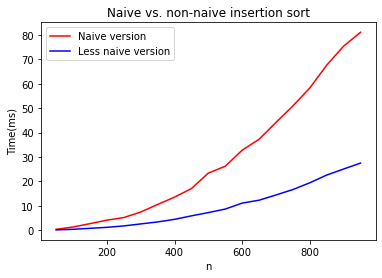

In [10]:
plt.plot(nValuesNaive, tValuesNaive, color="red", label="Naive version")
plt.plot(nValues, tValues, color="blue", label="Less naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive vs. non-naive insertion sort")


Well, that does agree with our intuition that the naive version should take longer. 

But, naive or not, InsertionSort's performance is quadratic with the size of the input. 